In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
medical_cost = pd.read_csv('medicalCost.csv')
medical_dummy = pd.read_csv('medicalButDummy.csv')
medical_dummy.head()
medical_dummy = pd.get_dummies(medical_dummy, columns=['region'])

#I do not need a feature of reigon or mabey can reset it to 0s and 1s
# southwest ==> 1
#0rthwest ==> 2
#southeast ==> 3
#0rtheast ==> 4
#by the way female ==>1 , male ==> 0
#and yes ==>1, no==>0
medical_dummy = medical_dummy[['age','sex','bmi','children','smoker','region_0rtheast','region_0rthwest','region_southeast','region_southwest','charges']]
#I know not the perfect way
medical_dummy.sample(10)




age
sex
bmi
children
smoker
region_0rtheast
region_0rthwest
region_southeast
region_southwest


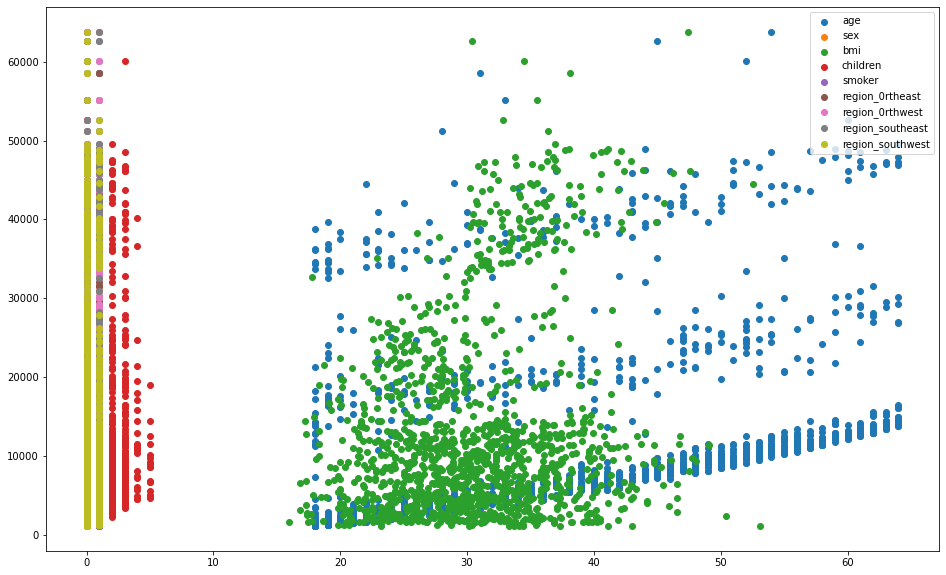

In [ ]:
#let's graph our data
#plt.scatter(medical_dummy.age,medical_dummy.charges)
#plt.scatter(medical_dummy.smoker,medical_dummy.charges)
#plt.scatter(changes,medical_dummy.charges)
features = ['age','sex','bmi','children','smoker','region_0rtheast','region_0rthwest','region_southeast','region_southwest']
  
for feature in features:
    print(feature)
    if feature == 'age':
        plt.figure(figsize=(16,10))
    plt.scatter(medical_dummy[feature], medical_dummy.charges , label=feature)
    if feature == 'region_southwest':
       plt.legend()


 

DEfine X and Y

In [ ]:
x  = medical_dummy.drop(['charges'],axis=1).values
y = medical_cost['charges'].values
print(x)
print("=="*100)
print(y)
print("=="*100)

[[19.    1.   27.9  ...  0.    0.    1.  ]
 [18.    0.   33.77 ...  0.    1.    0.  ]
 [28.    0.   33.   ...  0.    1.    0.  ]
 ...
 [18.    1.   36.85 ...  0.    1.    0.  ]
 [21.    1.   25.8  ...  0.    0.    1.  ]
 [61.    1.   29.07 ...  1.    0.    0.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=1/3, random_state=0) 


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(x_test)
print(y_pred)

[11222.23652679  9759.393728   37577.10320663 15888.41331557
  6763.87804875  4015.99846262  1563.00924391 14387.48259546
  9008.31511749  7387.37658795  4982.85884079 10267.60147012
  8877.45557743  3932.45795816 27104.10055565 11246.13277066
 11052.14424774  6112.79708558  8062.22351758 26661.82916058
 33220.75627008 14296.6182621  11858.57028138 31949.59262748
  4076.208821    9244.94589385  1216.49046228 10230.25862605
  3879.68349529 10278.31570509  9031.79080775 39858.72086391
 15606.03753488 13759.43542415 24474.52332671  5198.55587374
 12831.38177969 30264.13483314 33053.1629952   3472.25710834
  4124.70310325  3992.34735881 30193.98181315 38993.39391021
 27370.63934811  4855.26088102 11138.70393777  7588.50355273
  3801.78532291 10596.21981779  5642.14115516  3342.23519334
 32712.57677723 38507.56668475 16140.73828018  7038.21961151
  5649.9517963   9141.029829    9590.62089335 11603.74207531
  1630.38563311 38602.29568802 15363.83334078 11939.17297646
 14489.45794034 14075.85

In [ ]:
#let's do our own prediction for medical cost
#choosing manualy our XS from our data
LR.predict([[24,	1,	30.100,	3,	0,	0,	0,	0,	1]])
#4234.92700

array([5121.91526474])

In [ ]:
medical_dummy.sample(4)

,age,sex,bmi,children,smoker,region_0rtheast,region_0rthwest,region_southeast,region_southwest,charges
799,33,0,24.795,0,1,1,0,0,0,17904.52705
32,19,1,28.600,5,0,0,0,0,1,4687.79700
171,49,0,30.300,0,0,0,0,0,1,8116.68000
706,51,1,38.060,0,1,0,0,1,0,44400.40640


In [ ]:
print(LR.predict([[42,1,26.18,1,0,0,0,1,0]]))
#7046.72220
print(LR.predict([[35,0,39.71,4,0,1,0,0,0]]))
#19496.71917
print(LR.predict([[36,0,28.88,3,0,1,0,0,0]]))
#6748.59120
print(LR.predict([[39,0,34.10,2,0,0,0,1,0]]))
#23563.01618

[7425.16649649]
[12450.35053962]
[8632.28344431]
[9692.37825505]


In [ ]:
#time to have some fun with 
# age = 20
# sex = 0
# bmi = (weight / height{in meters}**2) = 24.691358024691358 ==> 24.69
#smoker = 0
# 0 0 0 1
#our made test ==> [20,0,24.69,0,0,0,0,1]
print(LR.predict([[20,0,24.69,0,0,0,0,0,1]]))


[584.1122452]


In [ ]:
80/(1.8**2)

24.691358024691358

In [ ]:
from sklearn.metrics import mean_squared_error

score = LR.score(x_test, y_test)
print("R-squared:", score) #best score is one
print("MSE:", mean_squared_error(y_true=y_test, y_pred=y_pred))

R-squared: 0.7877119303013088
MSE: 34037250.254169874


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7877119303013088

Text(0, 0.5, 'predicted value')

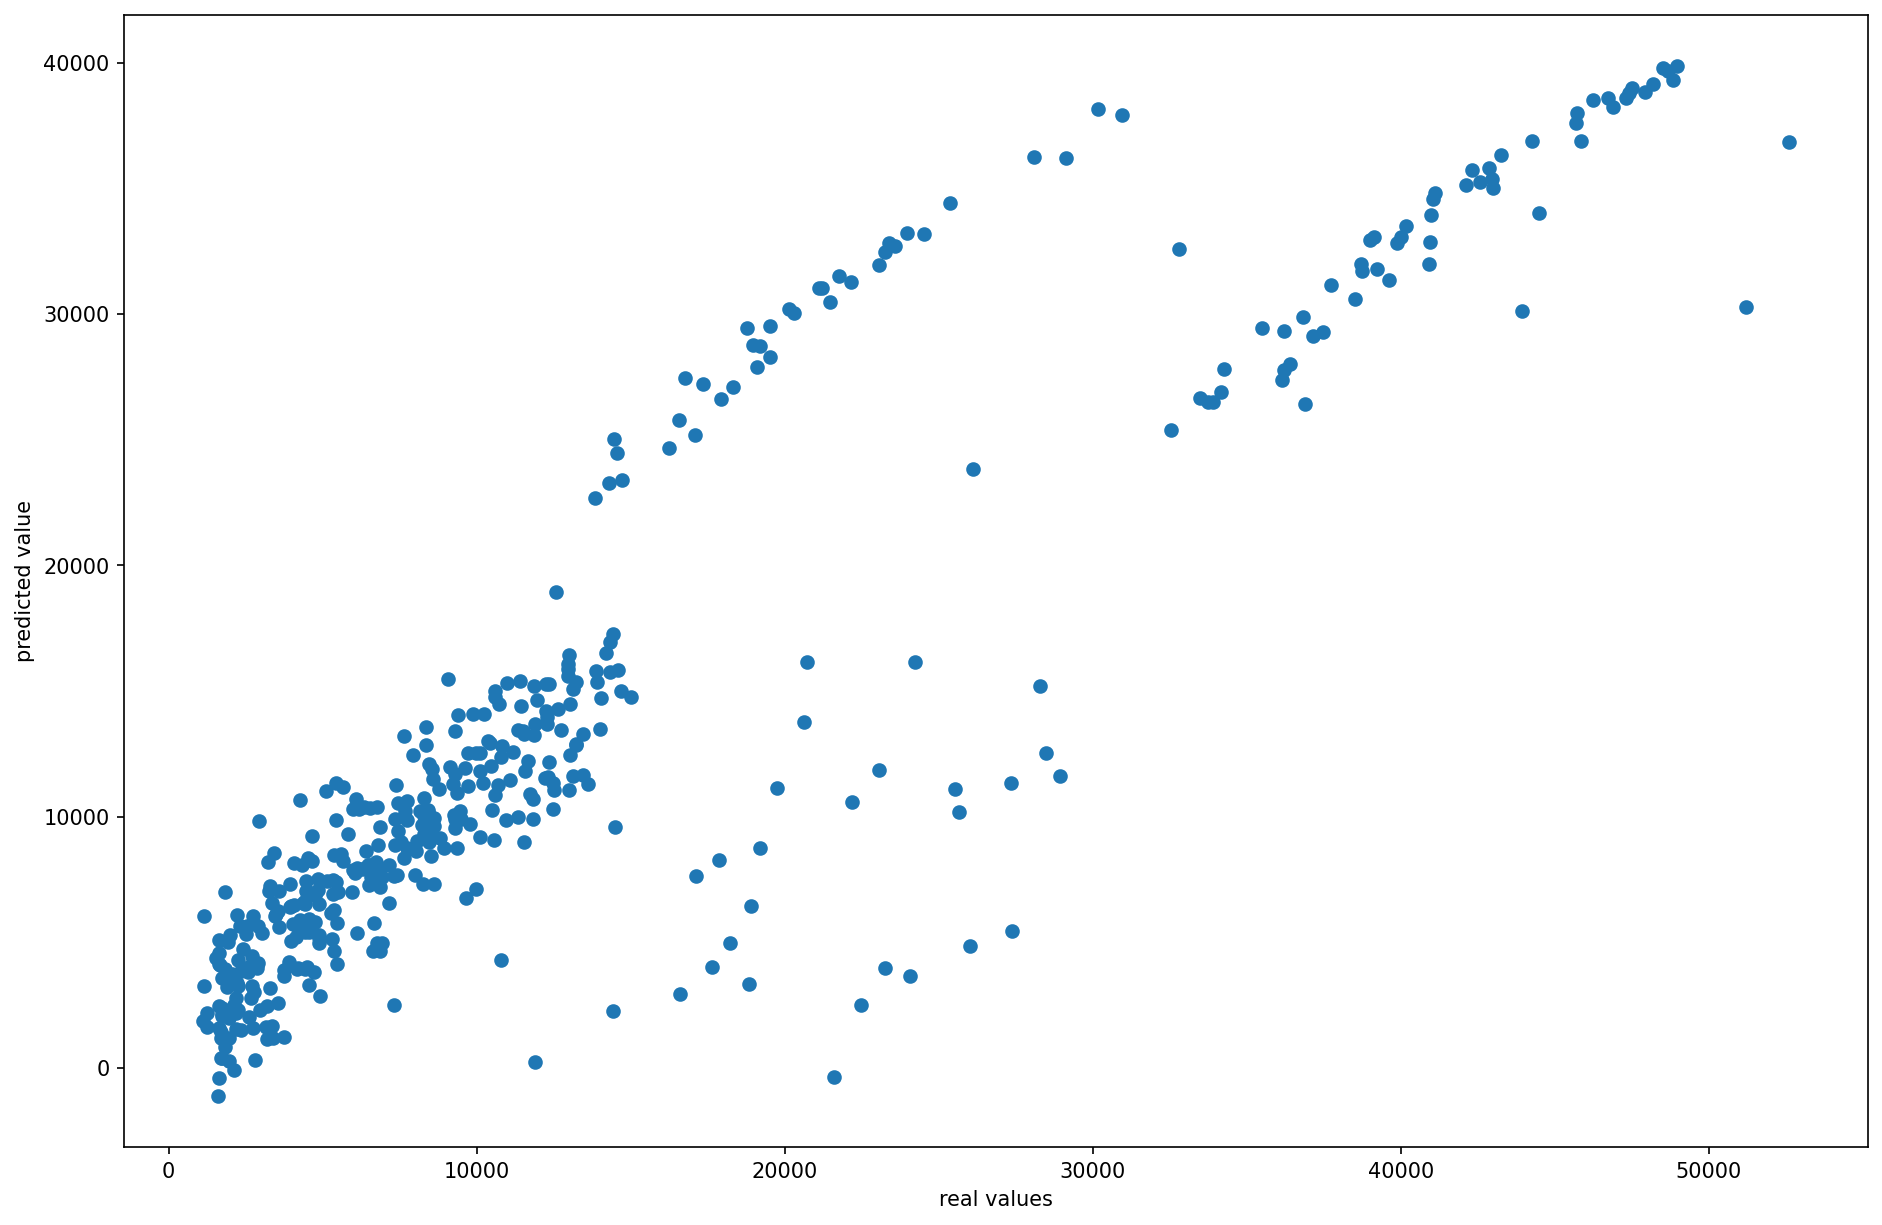

In [ ]:
#let's graph
plt.figure(figsize=(15,10), dpi=150)
plt.scatter(y_test,y_pred)
plt.xlabel("real values")
plt.ylabel("predicted value")

In [ ]:
prediction_tabel = pd.DataFrame({"charges": y_test, "predicted_charges": y_pred, "Y^-Y": y_test-y_pred})
prediction_tabel.sample(20)

,charges,predicted_charges,Y^-Y
268,40182.24600,33502.529229,6679.716771
304,13457.96080,13274.089496,183.871304
343,40904.19950,32003.768286,8900.431214
197,6551.75010,10352.328898,-3800.578798
236,9447.38240,10229.289457,-781.907057
174,4260.74400,5879.243806,-1618.499806
239,11729.67950,10901.429474,828.250026
275,5594.84550,8518.635515,-2923.790015
350,11552.90400,13289.828940,-1736.924940
78,20296.86345,30034.170846,-9737.307396


In [ ]:
#so let me make the final file 
#😓🐍 that dones't sound good
#prediction_tabel.drop(['charges'],axis=1) #droping the extra column as it is existing in the orginal one
#finalPred = pd.concat([medical_cost+prediction_tabel])
#finalPred
final = pd.concat([prediction_tabel,medical_cost])
final.sample(10)
#I would quick doing it with the code foe now ❌❌❌ 



,charges,predicted_charges,Y^-Y,age,sex,bmi,children,smoker,region
172,8310.83915,9907.098214,-1596.259064,NaN,NaN,NaN,NaN,NaN,NaN
238,6067.12675,7769.048855,-1701.922105,NaN,NaN,NaN,NaN,NaN,NaN
247,1986.93340,NaN,NaN,24.0,0.0,35.86,0.0,0.0,3.0
233,4561.18850,5408.504111,-847.315611,NaN,NaN,NaN,NaN,NaN,NaN
281,4320.41085,8056.356323,-3735.945473,NaN,NaN,NaN,NaN,NaN,NaN
280,22331.56680,NaN,NaN,40.0,1.0,28.12,1.0,1.0,4.0
1211,23563.01618,NaN,NaN,39.0,0.0,34.10,2.0,0.0,3.0
264,6664.68595,8009.736458,-1345.050508,NaN,NaN,NaN,NaN,NaN,NaN
1261,3277.16100,NaN,NaN,28.0,0.0,37.10,1.0,0.0,1.0
920,13451.12200,NaN,NaN,62.0,1.0,25.00,0.0,0.0,1.0


In [ ]:
#but who said that I can not do it with another way ...
prediction_tabel.to_csv("myFinalPredictions.csv")


'''
char_bar = medical_dummy.charges.values 
index = ['index '+str(n) for n in range(len(char_bar))]
#print(index)
for i in char_bar:
    plt.bar(index,char_bar[0])
 '''